In [1]:
from google.colab import files
files.upload()

Saving 6. Predict Employee Attrition.csv to 6. Predict Employee Attrition.csv


{'6. Predict Employee Attrition.csv': b'\xef\xbb\xbfAge,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager\r\n41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5\r\n49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7\r\n37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Ye

Accuracy :  0.891156462585034

Classification Report : 

               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294





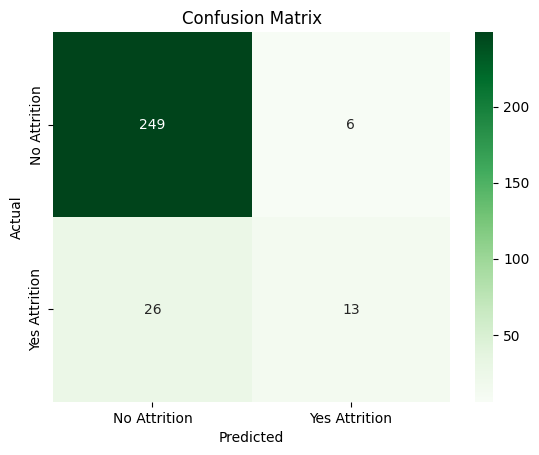

In [19]:
# Import necessary libraries for data handling, preprocessing, modeling, and visualization
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from CSV file into a DataFrame
df = pd.read_csv('6. Predict Employee Attrition.csv')

# Create a dictionary to store label encoders for each categorical column
label_encoders = {}

# Loop through all categorical columns (excluding the target column 'Attrition')
# and apply label encoding to convert them to numerical values
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Attrition':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])  # Replace the original column with encoded values
        label_encoders[column] = le  # Save the encoder for possible inverse transformation

# Convert the target variable 'Attrition' to binary values (Yes → 1, No → 0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Separate the features (X) and the target variable (y)
X = df.drop('Attrition', axis=1)  # Input features
y = df['Attrition']               # Target labels

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler and fit-transform the training data, then transform the test data
# This step ensures all features are on the same scale (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a Logistic Regression model using the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Use the trained model to predict attrition on the test dataset
y_pred = model.predict(X_test)

# Evaluate model performance using accuracy score and a detailed classification report
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("\nClassification Report : \n\n", classification_report(y_test, y_pred))
print("\n")
# Generate and display a confusion matrix to visualize true vs predicted classifications
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Attrition', 'Yes Attrition'],
            yticklabels=['No Attrition', 'Yes Attrition'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()